## Exploratory Data Analysis (EDA)
**Data Preprocessing**

In this section, I will;
1. Handle missing data (mean/median/drop).
2. Encode categorical variables (one-hot/label).
3. Normalize/standardize features.
4. Split data into train/test.
   

For this task, I chose the Titanic dataset, which is widely recognized as a beginner-friendly dataset for machine learning and data preprocessing. It is available as a built-in dataset in the Seaborn library, which makes it easy to load and start working with immediately without the need for external downloads. I selected this dataset because it contains a balanced mix of numerical, categorical, and boolean variables, along with missing values that provide a realistic scenario for practicing essential preprocessing steps. Additionally, the Titanic dataset has a clearly defined target variable (survived), making it suitable for downstream predictive modeling tasks later in the internship.

## Import dependencies

In [1]:
#imports
import os
import joblib
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# import pprint


## Dataset Exploration

In [2]:
# Load the Titanic dataset and then store it as `titanic_df`
titanic_df = sns.load_dataset('titanic')
# Save raw data
joblib.dump(titanic_df, "titanic_raw.pkl")

['titanic_raw.pkl']

## Visualization

Visualizing the missing values using bar chart. 

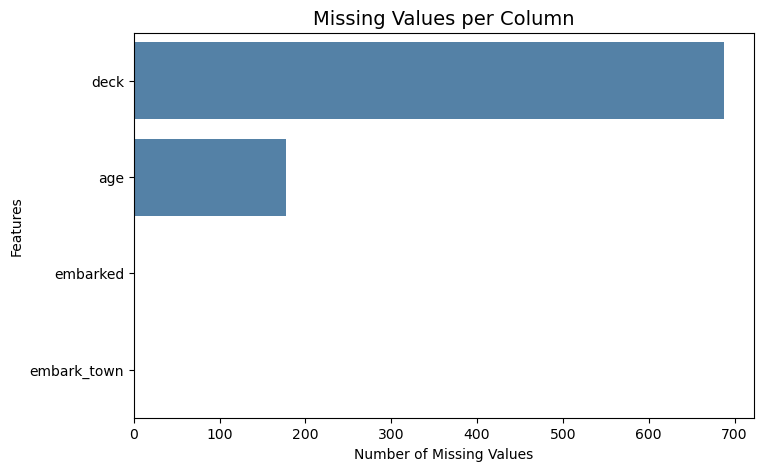

In [3]:
# Calculate missing values per column
missing = titanic_df.isnull().sum()

# Filter only columns with missing data
missing = missing[missing > 0].sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=missing.values, y=missing.index, color="steelblue")
plt.title("Missing Values per Column", fontsize=14)
plt.xlabel("Number of Missing Values")
plt.ylabel("Features")
plt.show()


 Heatmap of Missing Values

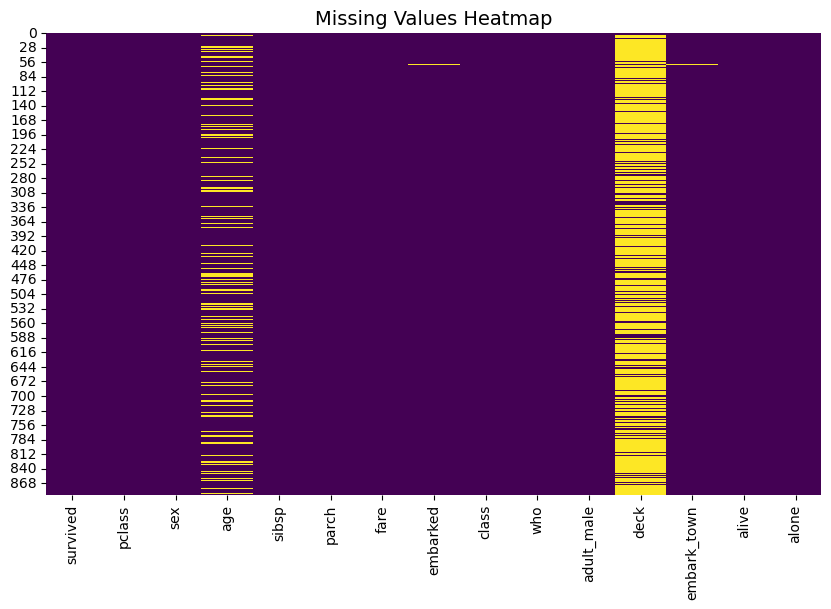

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()


In [4]:
# Display the first five rows of the dataset to verify
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Display the data structure
# titanic_df.shape
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# Quick EDA summary
print("Missing Values Analysis:")
print(titanic_df.isnull().sum())
print("\nDataset Overview:")
print(titanic_df.describe())

Missing Values Analysis:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Dataset Overview:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80

In the exploration of the Titanic dataset, I examined the dataset structure using `.info()` as well as `.describe()` etc. The dataset contains 891 entries with 15 columns, including numerical, categorical, and boolean variables. Several columns have missing values: **`age`** has 177 missing entries, **`embarked`** has 2, while **`deck`** has a significant number of missing values (688), making it a candidate for removal due to sparsity. The dataset also contains multiple categorical variables such as **`sex`**, **`embarked`**, **`class`**, **`who`**, and **`embark_town`**, along with boolean variables like **`adult_male`** and **`alone`**. The key target variable for predictive modeling is **`survived`**, which indicates whether a passenger survived the disaster. This step establishes a clear understanding of the data composition and highlights areas requiring preprocessing before model building.


## Wrangle Function
1. Handling Missing Values.
2. Encoding Categorical Variables.
3. Feature Scaling

**Since I’ve identified the preprocessing steps required, I will wrapped them into a reusable function called wrangle() to automate the cleaning process.**

In [7]:
def wrangle(df, filename="", return_scaler=False):
    """
    Cleans and preprocesses the Titanic dataset for machine learning.
    
    Preprocessing steps:
    1. Drops columns with excessive missing values or redundant information
    2. Handles missing values using statistical imputation
    3. Encodes categorical variables using one-hot encoding
    4. Standardizes numerical features
    
    Parameters:
        df (pd.DataFrame): Raw Titanic DataFrame
        return_scaler (bool): Whether to return the fitted scaler object
        filename (str): empty by default, but when provided will be used for filename save
    
    Returns:
        pd.DataFrame: Preprocessed DataFrame ready for ML
        StandardScaler (optional): Fitted scaler object if return_scaler=True
    """
    # Get current directory
    current_dir = os.getcwd()    
    save_path = os.path.join(current_dir, filename)

    # Create copy to avoid modifying original data
    df_clean = df.copy()
    
    # 1. DROP IRRELEVANT COLUMNS
    columns_to_drop = ['deck', 'alive', 'class', 'who']
    df_clean = df_clean.drop(columns=columns_to_drop)
    
    # 2. HANDLE MISSING VALUES
    # Fill age with median (robust to outliers)
    df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())
    
    # Fill categorical variables with mode (most frequent value)
    df_clean['embarked'] = df_clean['embarked'].fillna(df_clean['embarked'].mode()[0])
    df_clean['embark_town'] = df_clean['embark_town'].fillna(df_clean['embark_town'].mode()[0])
    
    # 3. ENCODE CATEGORICAL VARIABLES
    # One-hot encoding with drop_first=True to avoid multicollinearity
    df_clean = pd.get_dummies(
        df_clean, 
        columns=['sex', 'embarked', 'embark_town'], 
        drop_first=True,
        dtype=int  # Ensure integer dummy variables
    )
    
    # 4. STANDARDIZE NUMERICAL FEATURES
    numerical_features = ['age', 'fare', 'sibsp', 'parch']
    scaler = StandardScaler()
    df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])

    # Save if filename provided
    if filename:
        joblib.dump(df, save_path)
        print(f"✅ Cleaned dataset saved at {save_path}")
    
    # return data and scaler   
    return (df_clean, scaler) if return_scaler else df

## Loading raw data into wrangle() function for cleaning

In [8]:
# Load and preprocess data
print("Loading raw Titanic dataset...")
titanic_df = joblib.load("titanic_raw.pkl")

print("Applying preprocessing pipeline...")
titanic_clean, scaler = wrangle(titanic_df, filename="titanic_preprocessed.pkl", return_scaler=True)

# Save the scaler for future use
joblib.dump(scaler, "titanic_scaler.pkl")
print("Scaler saved as 'titanic_scaler.pkl'")

# Display preprocessing results
print(f"\nPreprocessing Summary:")
print(f"Original shape: {titanic_df.shape}")
print(f"Cleaned shape: {titanic_clean.shape}")
print(f"Features removed: {titanic_df.shape[1] - titanic_clean.shape[1]}")

Loading raw Titanic dataset...
Applying preprocessing pipeline...
✅ Cleaned dataset saved at /var/www/filebrowser/.projects/stock_prediction/titanic_preprocessed.pkl
Scaler saved as 'titanic_scaler.pkl'

Preprocessing Summary:
Original shape: (891, 15)
Cleaned shape: (891, 13)
Features removed: 2


In [9]:
# Show first few rows
print("\n📌 First 3 rows of preprocessed data:\n")
pprint(titanic_clean.head(3).to_dict(orient="records"))

missing_values = titanic_clean.isnull().sum().sum()
print(f"\n✅ Remaining missing values: {missing_values}")



📌 First 3 rows of preprocessed data:

[{'adult_male': True,
  'age': -0.5657364610748746,
  'alone': False,
  'embark_town_Queenstown': 0,
  'embark_town_Southampton': 1,
  'embarked_Q': 0,
  'embarked_S': 1,
  'fare': -0.5024451714361923,
  'parch': -0.4736736092984604,
  'pclass': 3,
  'sex_male': 1,
  'sibsp': 0.4327933656785018,
  'survived': 0},
 {'adult_male': False,
  'age': 0.6638610320657843,
  'alone': False,
  'embark_town_Queenstown': 0,
  'embark_town_Southampton': 0,
  'embarked_Q': 0,
  'embarked_S': 0,
  'fare': 0.7868452935884461,
  'parch': -0.4736736092984604,
  'pclass': 1,
  'sex_male': 0,
  'sibsp': 0.4327933656785018,
  'survived': 1},
 {'adult_male': False,
  'age': -0.2583370877897099,
  'alone': True,
  'embark_town_Queenstown': 0,
  'embark_town_Southampton': 1,
  'embarked_Q': 0,
  'embarked_S': 1,
  'fare': -0.4888542575852486,
  'parch': -0.4736736092984604,
  'pclass': 3,
  'sex_male': 0,
  'sibsp': -0.47454519624983954,
  'survived': 1}]

✅ Remaining mi

###  Full Summary

In this notebook, I carried out a complete preprocessing workflow on the Titanic dataset to prepare it for machine learning applications. The process began with exploratory data analysis (EDA) to understand the dataset’s structure, identify missing values, and highlight redundant or incomplete features. Based on this analysis, I dropped irrelevant columns (deck, alive, class, who), handled missing data by imputing age with the median and embarked/embark_town with their most frequent categories, and retained only informative variables.

Next, I transformed categorical features (sex, embarked, embark_town) into numeric form using One-Hot Encoding with drop_first=True to prevent multicollinearity. For numerical features (age, fare, sibsp, and parch), I applied standardization using StandardScaler, ensuring all features share a comparable scale.

Finally, I consolidated all these steps into a reusable wrangle() function, which automates the cleaning pipeline and saves the processed dataset. With these steps complete, the Titanic dataset is now clean, consistent, and ready for downstream machine learning tasks such as regression, classification, or neural networks.